In [1]:
from packages import *

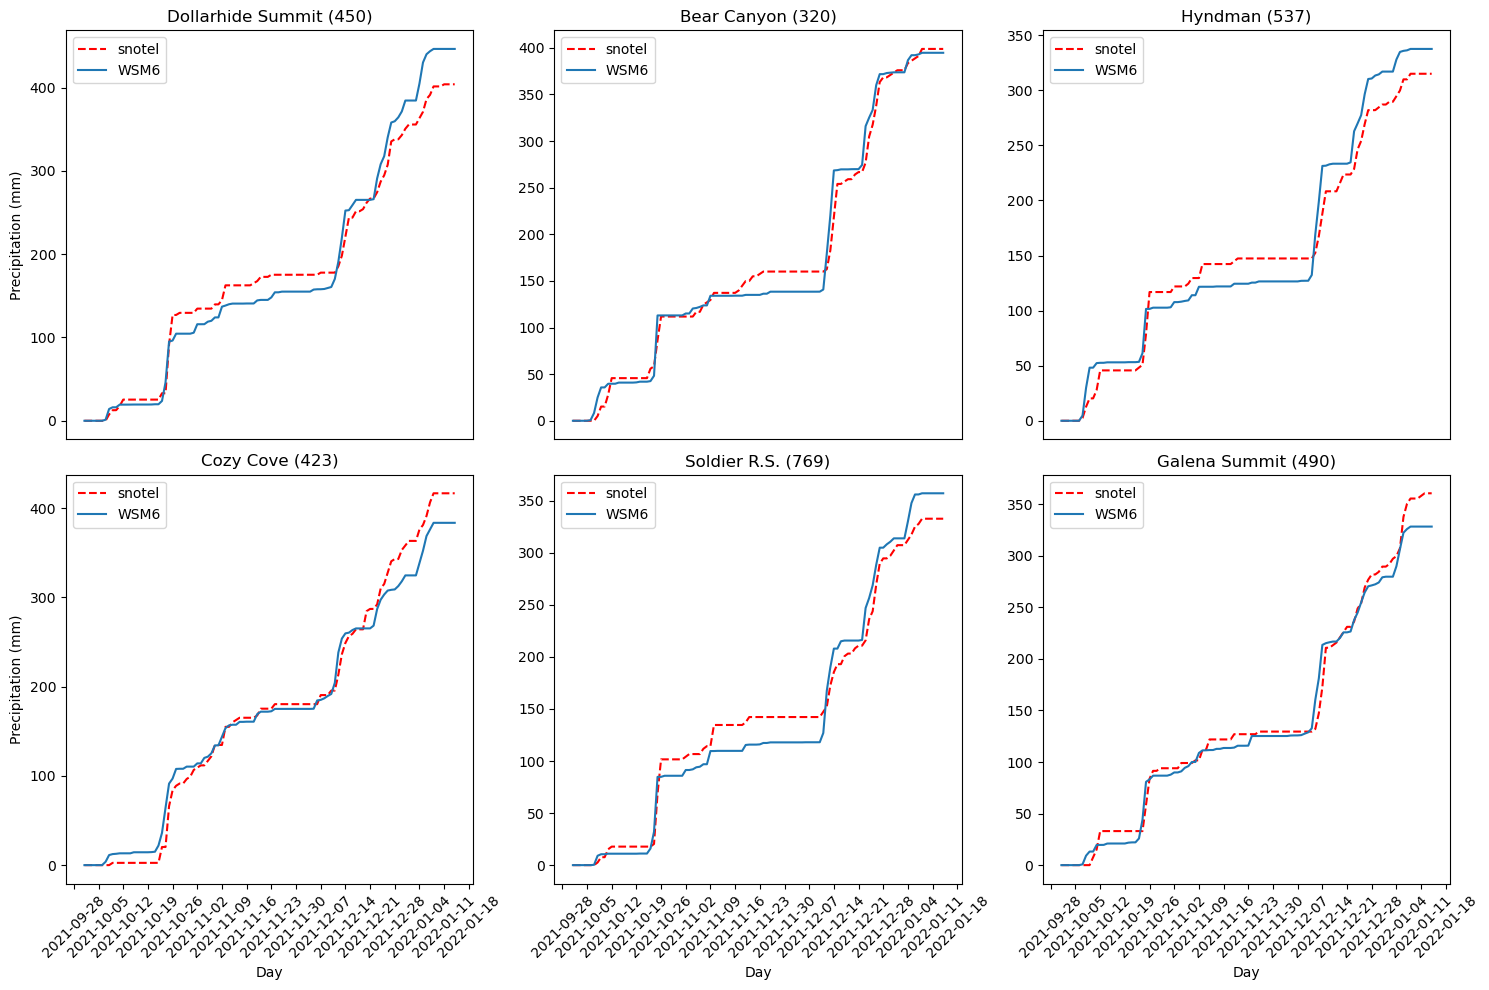

In [2]:

x = getclosest('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               '/bsuhome/stanleyakor/Python-tutorial/wrf-python/short.nc', 'WSM6_TEST')
x.compare_smallest()

In [3]:
file_list = {}
file_list['Thompson'] = 'thom.nc'
file_list['Morrison'] = 'mor.nc'

In [4]:
x = CompareScheme('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               'short.nc', 'TEST','WSM6')

Keys in sub-dictionary 'Thompson' do not match.


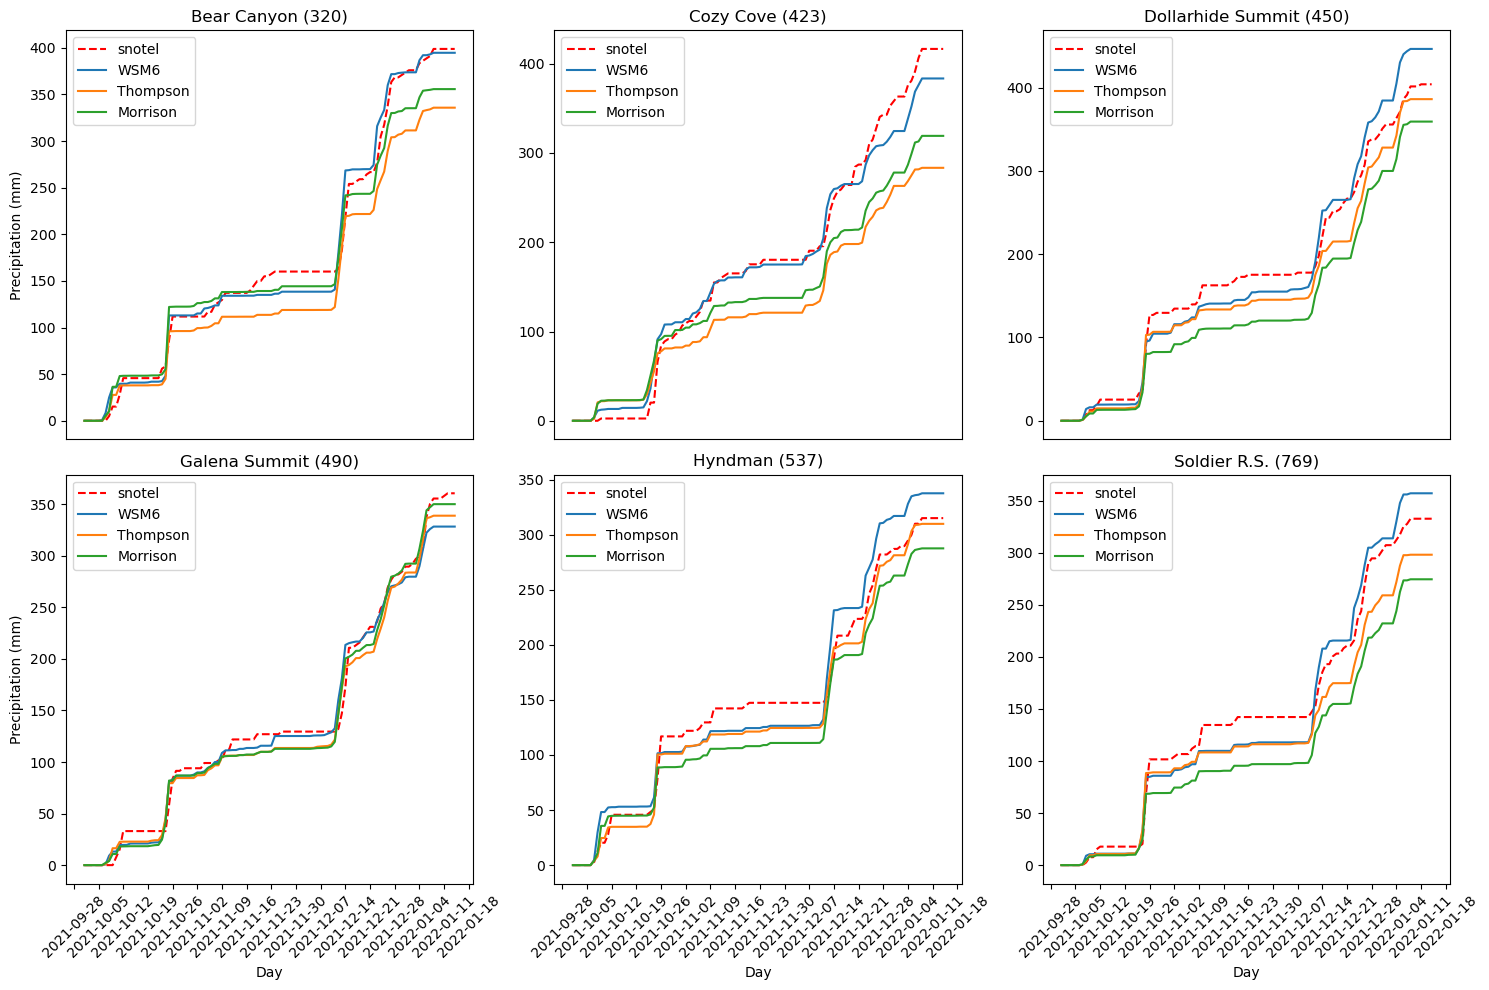

In [5]:
x.smallest(file_list)

In [6]:
y = plot_snotel_grid('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               'short.nc', 'TEST','WSM6')


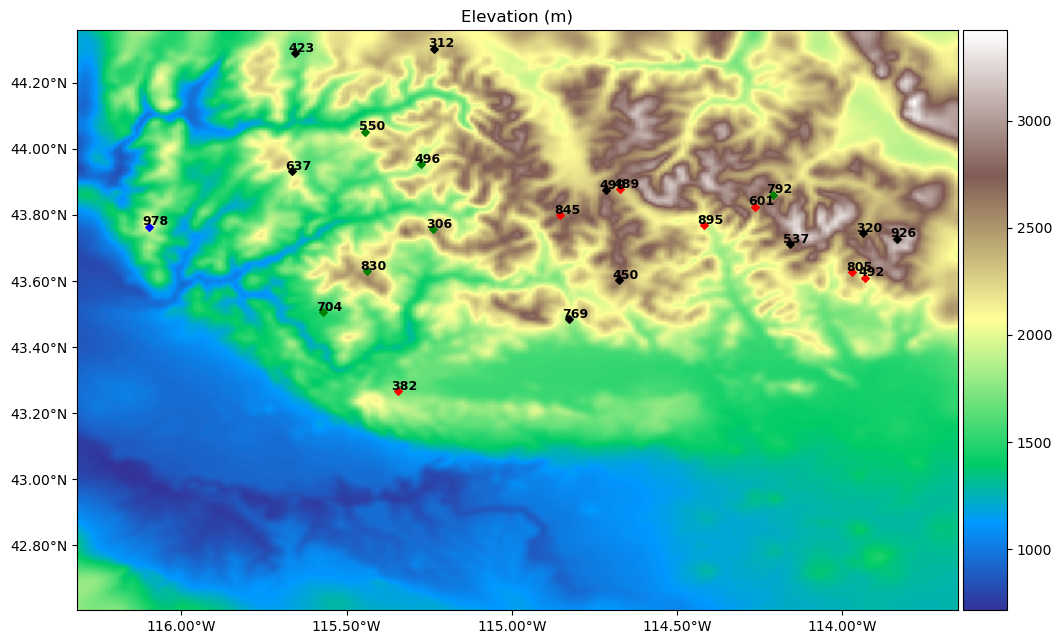

In [7]:
y.multiple_points()

In [8]:
#x = pd.read_csv('NRCS_SNOTEL_Locations_noAlaska.csv')